In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycountry

In [2]:
df = pd.read_csv('intern_task.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608,55811,56682,57475,58178,58782,...,102880,103594,104257,104874,105439,105962,106442,106585,106537,106445
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579,134169237,137835590,141630546,145605995,149742351,...,567892149,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,...,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290,99314028,101445032,103667517,105959979,108336203,...,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195,5441333,5521400,5599827,5673199,5736582,...,26147002,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987


In [3]:
# separate country and cluster
df['is_country'] = df.apply(lambda df: pycountry.countries.get(alpha_3 = df['Country Code']), axis=1)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,is_country
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608,55811,56682,57475,58178,58782,...,103594,104257,104874,105439,105962,106442,106585,106537,106445,"Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼'..."
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579,134169237,137835590,141630546,145605995,149742351,...,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132,None
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,...,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,"Country(alpha_2='AF', alpha_3='AFG', flag='🇦🇫'..."
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290,99314028,101445032,103667517,105959979,108336203,...,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870,None
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195,5441333,5521400,5599827,5673199,5736582,...,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987,"Country(alpha_2='AO', alpha_3='AGO', flag='🇦🇴'..."


In [4]:
df.drop(['Indicator Code', 'Indicator Name', 'Country Code'], axis=1, inplace=True)
df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,is_country
0,Aruba,54608,55811,56682,57475,58178,58782,59291,59522,59471,...,103594,104257,104874,105439,105962,106442,106585,106537,106445,"Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼'..."
1,Africa Eastern and Southern,130692579,134169237,137835590,141630546,145605995,149742351,153955516,158313235,162875171,...,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132,None
2,Afghanistan,8622466,8790140,8969047,9157465,9355514,9565147,9783147,10010030,10247780,...,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,"Country(alpha_2='AF', alpha_3='AFG', flag='🇦🇫'..."
3,Africa Western and Central,97256290,99314028,101445032,103667517,105959979,108336203,110798486,113319950,115921723,...,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870,None
4,Angola,5357195,5441333,5521400,5599827,5673199,5736582,5787044,5827503,5868203,...,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987,"Country(alpha_2='AO', alpha_3='AGO', flag='🇦🇴'..."


In [5]:
df_country = df[df['is_country'].notna()]
df_country.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,is_country
0,Aruba,54608,55811,56682,57475,58178,58782,59291,59522,59471,...,103594,104257,104874,105439,105962,106442,106585,106537,106445,"Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼'..."
2,Afghanistan,8622466,8790140,8969047,9157465,9355514,9565147,9783147,10010030,10247780,...,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,"Country(alpha_2='AF', alpha_3='AFG', flag='🇦🇫'..."
4,Angola,5357195,5441333,5521400,5599827,5673199,5736582,5787044,5827503,5868203,...,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987,"Country(alpha_2='AO', alpha_3='AGO', flag='🇦🇴'..."
5,Albania,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,2022272,...,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2777689,"Country(alpha_2='AL', alpha_3='ALB', flag='🇦🇱'..."
6,Andorra,9443,10216,11014,11839,12690,13563,14546,15745,17079,...,71621,71746,72540,73837,75013,76343,77700,79034,79824,"Country(alpha_2='AD', alpha_3='AND', flag='🇦🇩'..."


In [6]:
df_country_group = df[df['is_country'].isna()]
df_country_group.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,is_country
1,Africa Eastern and Southern,130692579,134169237,137835590,141630546,145605995,149742351,153955516,158313235,162875171,...,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132,None
3,Africa Western and Central,97256290,99314028,101445032,103667517,105959979,108336203,110798486,113319950,115921723,...,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870,None
7,Arab World,93359407,95760348,98268683,100892507,103618568,106444103,109394536,112499764,115729597,...,397922915,406501999,415077960,423664839,432545676,441467739,449228296,456520777,464684914,None
36,Central Europe and the Baltics,91401764,92232738,93009498,93840016,94715795,95440988,96146336,97043270,97884022,...,103496179,103257886,102994278,102740078,102538451,102398537,102180124,101413176,100108221,None
38,Channel Islands,109186,110225,111281,112410,113596,114832,116116,117430,118707,...,160912,162190,163721,165215,167259,169410,171113,172683,174079,None


In [7]:
# Delete the column 'is_country' since we don't need it yet 

df_country.drop('is_country', axis=1, inplace=True)
df_country_group.drop('is_country', axis=1, inplace=True)


C:\Users\pc\AppData\Local\Temp\ipykernel_18880\2514097171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.drop('is_country', axis=1, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_18880\2514097171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_group.drop('is_country', axis=1, inplace=True)


In [8]:
df_country

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,54608,55811,56682,57475,58178,58782,59291,59522,59471,...,102880,103594,104257,104874,105439,105962,106442,106585,106537,106445
2,Afghanistan,8622466,8790140,8969047,9157465,9355514,9565147,9783147,10010030,10247780,...,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771
4,Angola,5357195,5441333,5521400,5599827,5673199,5736582,5787044,5827503,5868203,...,26147002,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987
5,Albania,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,2022272,...,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2777689
6,Andorra,9443,10216,11014,11839,12690,13563,14546,15745,17079,...,71367,71621,71746,72540,73837,75013,76343,77700,79034,79824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Samoa,113335,116820,120163,123416,126582,129789,132976,135752,138154,...,199939,201757,203571,205544,207630,209701,211905,214929,218764,222382
259,"Yemen, Rep.",5542459,5646668,5753386,5860197,5973803,6097298,6228430,6368014,6515904,...,26984002,27753304,28516545,29274002,30034389,30790513,31546691,32284046,32981641,33696614
260,South Africa,16520441,16989464,17503133,18042215,18603097,19187194,19789771,20410677,21050540,...,53873616,54729551,55876504,56422274,56641209,57339635,58087055,58801927,59392255,59893885
261,Zambia,3119430,3219451,3323427,3431381,3542764,3658024,3777680,3901288,4029173,...,15234976,15737793,16248230,16767761,17298054,17835893,18380477,18927715,19473125,20017675


In [9]:
# sort the data by 2022 population
df_country= df_country.sort_values(by = "2022", ascending = False)
df_country_group =df_country_group.sort_values(by = "2022", ascending= False)
df_country

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
109,India,445954579,456351876,467024193,477933619,489059309,500114346,510992617,521987069,533431909,...,1291132063,1307246509,1322866505,1338636340,1354195680,1369003306,1383112050,1396387127,1407563842,1417173173
40,China,667070000,660330000,665770000,682335000,698355000,715185000,735400000,754550000,774510000,...,1363240000,1371860000,1379860000,1387790000,1396215000,1402760000,1407745000,1411100000,1412360000,1412175000
249,United States,180671000,183691000,186538000,189242000,191889000,194303000,196560000,198712000,200706000,...,316059947,318386329,320738994,323071755,325122128,326838199,328329953,331511512,332031554,333287557
106,Indonesia,88382881,90816938,93345489,95962527,98675061,101157868,103561105,106260749,109138723,...,253275918,256229761,259091970,261850182,264498852,267066843,269582878,271857970,273753191,275501339
183,Pakistan,45954226,47060915,48161841,49325050,50552592,51841626,53199414,54629793,56124743,...,205337562,208251628,210969298,213524840,216379655,219731479,223293280,227196741,231402117,235824862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,St. Martin (French part),4135,4258,4388,4524,4666,4832,5044,5294,5497,...,35639,35261,35020,34811,34496,33852,33121,32553,31948,31791
253,British Virgin Islands,7850,7885,7902,7919,7949,8018,8139,8337,8649,...,28657,28971,29366,29739,30060,30335,30610,30910,31122,31305
187,Palau,9446,9639,9851,10076,10318,10563,10813,10992,11079,...,17805,17796,17794,17816,17837,17864,17916,17972,18024,18055
178,Nauru,4582,4753,4950,5198,5484,5804,6021,6114,6288,...,10694,10940,11185,11437,11682,11924,12132,12315,12511,12668


In [10]:
first_five_countries=df_country[:5]
first_five_groups=df_country_group[:6]
first_five_groups

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
263,World,3031474234,3072421801,3126849612,3193428894,3260441925,3328209022,3398480280,3468370526,3540164023,...,7229303088,7317040295,7403850164,7490415449,7576441961,7660371127,7741774583,7820205606,7888305693,7950946801
103,IDA & IBRD total,2297972283,2329503799,2374276327,2431314278,2488809469,2547220471,2608583276,2670092279,2733532608,...,6079501853,6160290229,6240231201,6319805369,6399653365,6477695468,6553978299,6627317499,6695487825,6754029970
139,Low & middle income,2243178704,2274049905,2318172647,2374537275,2431354529,2489218929,2550048939,2610858879,2673666819,...,6000646643,6081160760,6160876270,6240319049,6320334263,6399036689,6476092964,6549996251,6618837270,6678280291
155,Middle income,2107416130,2135115636,2175939784,2228877289,2282093614,2336192886,2393145155,2449880184,2508410677,...,5446810885,5513458464,5578703242,5642635550,5706387405,5768170863,5827337512,5882942581,5933587229,5974552342
102,IBRD only,1904346683,1926042536,1960606353,2007060959,2053555416,2100537138,2150132295,2199465757,2250275429,...,4567977613,4616584921,4663653202,4709004177,4753252242,4794555928,4832928887,4867091692,4895372787,4913887020
62,Early-demographic dividend,979461502,1004319366,1029962253,1056327420,1083430197,1110603410,1137875812,1166092667,1195278339,...,3078407213,3121656203,3165214886,3208369547,3250752755,3292896609,3334561751,3374383528,3411268373,3447398652


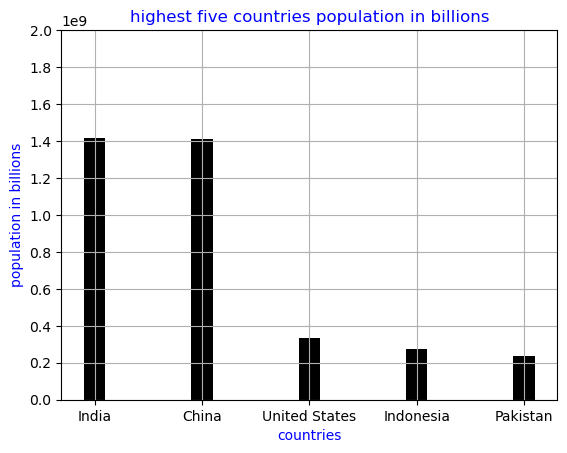

In [37]:
plt.bar(  first_five_countries["Country Name"],height= first_five_countries["2022"], width=.2, color= "black")
plt.yticks(np.linspace(0,2000000000, 11))
plt.grid(True)
plt.title("highest five countries population in billions", c= "b")
plt.xlabel("countries" ,c = "b")
plt.ylabel("population in billions", c="b")
plt.show()

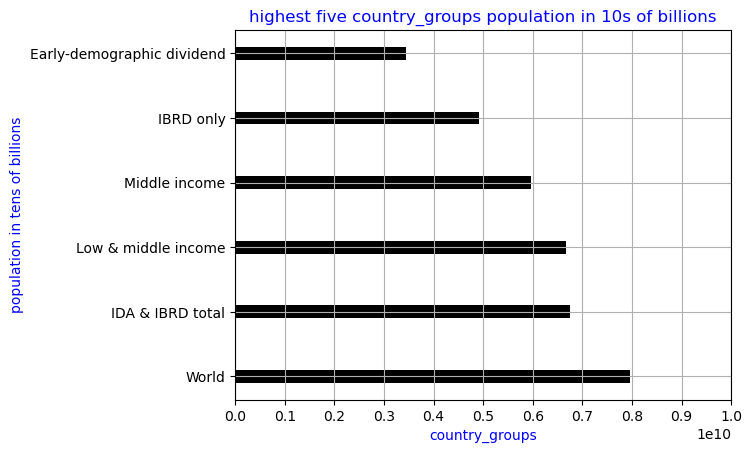

In [36]:
plt.barh(y= first_five_groups["Country Name"], width= first_five_groups["2022"], height=.2, color= "black")
plt.xticks(np.linspace(0,10000000000, 11))
plt.grid(True)
plt.title("highest five country_groups population in 10s of billions", c= "b")
plt.xlabel("country_groups" ,c = "b")
plt.ylabel("population in tens of billions", c="b")
plt.show()

## Transpose the dataframe 

In [12]:
# def transpose_df(df):
#     df = df.set_index('Country Name').T.reset_index().rename(columns = {'index':'date'})
#     df['date'] = pd.to_datetime(df['date'], format='%Y', errors='coerce')
#     display(df.head()) # like print but this is used for data frames to make the shape you see below
#     return df

# df_country = transpose_df(df_country)
# df_country_group = transpose_df(df_country_group)